In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats.mstats import pearsonr, spearmanr

In [2]:
subset = False
fol = '/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22_tiered_rankedidea/inflection_point_based/perctcorr/flow_with_inflectionpoint'

files = os.listdir(fol)

if '.ipynb_checkpoints' in files:
    files.remove('.ipynb_checkpoints')

if '.DS_Store' in files:
    files.remove('.DS_Store')

In [3]:
dfs = []
for i, file in enumerate(files):
    data = pd.read_csv(fol + '/' + file, sep='\t', index_col=0)
    df = pd.DataFrame(data)
    dfs.append(df.copy())
    
for i, df in enumerate(dfs):
    cols = []
    for cell in list(df.columns):
        if '.x' in cell:
            cols.append(cell.split('.')[0])
        elif '.y' in cell:
            cols.append(cell.split('.')[0] + '_real')
        else:
            cols.append(cell)
    df.columns = cols

for i, df in enumerate(dfs): 
    if i == 0:
        samples = list(df.index)
        columns = list(df.columns)
    else:
        new_samples = list(df.index)
        new_columns = list(df.columns)
        samples = list(set(new_samples).intersection(samples))
        columns = list(set(new_columns + columns))
    columns = list(set(columns))


new_columns = []
for col in columns:
    if '_real' in col:
        new_columns.append(col.split('_')[0])
        
columns = new_columns
print(columns)

['Tregs', 'Mono', 'NaiveCD4', 'em8', 'PC', 'nB', 'cm4', 'NK', 'NaiveCD8', 'mB', 'cm8', 'ed8', 'em4']


In [4]:
#cytof
#columns=['NaiveCD8', 'em4', 'cm8', 'mB', 'ed8', 'Mono', 'nB', 'Tregs', 'cm4', 'NK', 'NaiveCD4', 'em8']  #["CD4","CD8","Tr","mB","nB","m4","Mn","NK"] #,"DC","Eo","mNeu"]

#flow
columns=['em4',  'mB',  'Mono', 'nB', 'Tregs', 'cm4', 'NK', 'NaiveCD4']

In [5]:
def generate_df_dic(correlation, dfs, columns):
    df_corr = {}
    for i, df in enumerate(dfs):
        if subset:
            df = df.loc[samples, :]
        for cell in columns:
            if cell in df.columns:
                if cell not in df_corr:
                    df_corr[cell] = []
                corr = correlation(list(df[cell]), list(df[cell + '_real']))[0]
                df_corr[cell].append(corr)
            else:
                df_corr[cell].append(float('NaN'))
    return df_corr

In [6]:
df_pearson_dic = generate_df_dic(pearsonr, dfs, columns)
df_spearman_dic = generate_df_dic(spearmanr, dfs, columns)

In [7]:
df_pearson = pd.DataFrame.from_dict(df_pearson_dic, orient='index', columns = files)
df_spearman = pd.DataFrame.from_dict(df_spearman_dic, orient='index', columns = files)





#irfmethodnames=['ranked_v1_top100','ranked_v1_top500','ranked_v1_top1000','ranked_v2_top100','ranked_v2_top500','ranked_v2_top1000','ranked_v1meth.1_SM_top100','ranked_v1meth.1_SM_top500','ranked_v1meth.1_SM_top1000','ranked_v2meth.1_SM_top100','ranked_v2meth.1_SM_top500','ranked_v2meth.1_SM_top1000','ranked_v1meth.2_SM_top100','ranked_v1meth.2_SM_top500','ranked_v1meth.2_SM_top1000','ranked_v2meth.2_SM_top100','ranked_v2meth.2_SM_top500','ranked_v2meth.2_SM_top1000','ranked_v1meth.3_SM_top100','ranked_v1meth.3_SM_top500','ranked_v1meth.3_SM_top1000','ranked_v2meth.3_SM_top100','ranked_v2meth.3_SM_top500','ranked_v2meth.3_SM_top1000']
irfmethodnames=['ranked_v1_top50','ranked_v1_top100','ranked_v1_top500','ranked_v1_top1000','ranked_v1_inflection','ranked_v2_top50','ranked_v2_top100','ranked_v2_top500','ranked_v2_top1000','ranked_v2_inflection']
df_pearson=df_pearson[irfmethodnames]

display(df_pearson)



,ranked_v1_top50,ranked_v1_top100,ranked_v1_top500,ranked_v1_top1000,ranked_v1_inflection,ranked_v2_top50,ranked_v2_top100,ranked_v2_top500,ranked_v2_top1000,ranked_v2_inflection
em4,-0.088244,0.493977,0.458097,0.442100,0.449149,0.621736,0.622268,0.549962,0.550850,0.564214
mB,0.758540,0.660419,0.890698,0.929043,0.865241,0.852383,0.890511,0.940056,0.934594,0.940710
Mono,0.304865,0.444730,0.795907,0.872545,0.537123,0.723404,0.771030,0.892764,0.888155,0.831634
nB,0.563720,0.844150,0.994930,0.989641,0.994613,0.964496,0.986280,0.982355,0.978451,0.981725
Tregs,-0.079657,0.113769,0.369805,0.326293,0.354147,0.363956,0.592633,0.541498,0.520205,0.547054
cm4,0.580832,0.718451,0.804100,0.886952,0.810227,0.539532,0.623599,0.788132,0.849014,0.799834
NK,0.833479,0.864161,0.878329,0.902119,0.837276,0.902221,0.905535,0.968636,0.968084,0.965229
NaiveCD4,0.847311,0.890167,0.747467,0.779156,0.781345,0.715043,0.701028,0.704349,0.732604,0.716763


In [8]:
df_pearson.rename(index={"NaiveCD8":"Naive CD8 T","NaiveCD4":"Naive CD4 T","CD4": "Naive CD4", "CD8": "Naive CD8","mB":"Memory B",'Mn':'Mono','CD14':'Mono','CD19':'B Cell','nB':'Naive B','PC':'Palsma','cm8':'CD8 central memory','em8':'CD8 effector memory','m8':'CD8 memory','ed8':'CD8 effector','cm4':'CD4 central memory','em4':'CD4 effector memory','m4':'CD4 memory','mNeu':'PMN','Eo':'Eosinophil','Tr':'Tregs','Mg':'Megakaryocyte'},inplace=True)
display(df_pearson)

,ranked_v1_top50,ranked_v1_top100,ranked_v1_top500,ranked_v1_top1000,ranked_v1_inflection,ranked_v2_top50,ranked_v2_top100,ranked_v2_top500,ranked_v2_top1000,ranked_v2_inflection
CD4 effector memory,-0.088244,0.493977,0.458097,0.442100,0.449149,0.621736,0.622268,0.549962,0.550850,0.564214
Memory B,0.758540,0.660419,0.890698,0.929043,0.865241,0.852383,0.890511,0.940056,0.934594,0.940710
Mono,0.304865,0.444730,0.795907,0.872545,0.537123,0.723404,0.771030,0.892764,0.888155,0.831634
Naive B,0.563720,0.844150,0.994930,0.989641,0.994613,0.964496,0.986280,0.982355,0.978451,0.981725
Tregs,-0.079657,0.113769,0.369805,0.326293,0.354147,0.363956,0.592633,0.541498,0.520205,0.547054
CD4 central memory,0.580832,0.718451,0.804100,0.886952,0.810227,0.539532,0.623599,0.788132,0.849014,0.799834
NK,0.833479,0.864161,0.878329,0.902119,0.837276,0.902221,0.905535,0.968636,0.968084,0.965229
Naive CD4 T,0.847311,0.890167,0.747467,0.779156,0.781345,0.715043,0.701028,0.704349,0.732604,0.716763


In [9]:
df_spearman.rename(index={"NaiveCD8":"Naive CD8 T","NaiveCD4":"Naive CD4 T","CD4": "Naive CD4", "CD8": "Naive CD8","mB":"Memory B",'Mn':'Mono','CD14':'Mono','CD19':'B Cell','nB':'Naive B','PC':'Palsma','cm8':'CD8 central memory','em8':'CD8 effector memory','m8':'CD8 memory','ed8':'CD8 effector','cm4':'CD4 central memory','em4':'CD4 effector memory','m4':'CD4 memory','mNeu':'PMN','Eo':'Eosinophil','Tr':'Tregs','Mg':'Megakaryocyte'},inplace=True)
df_spearman=df_spearman[irfmethodnames]


In [10]:
df_pearson.to_csv(fol + '_pearson_correlation.txt', sep='\t')
df_spearman.to_csv(fol + '_spearman_correlation.txt', sep='\t')

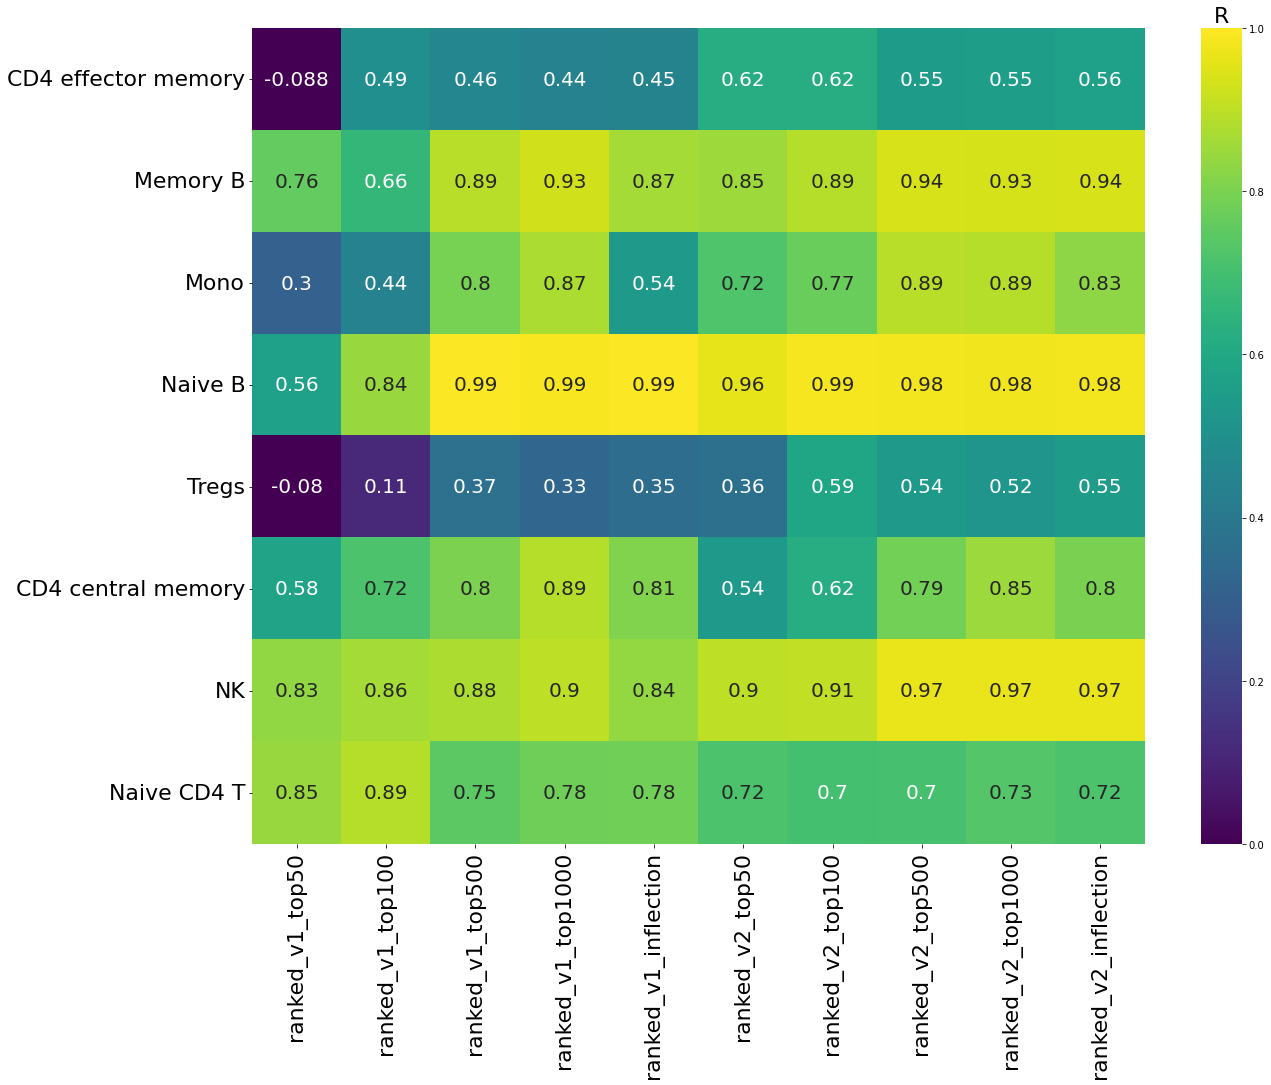

In [11]:
plt.figure(figsize=(20,15))
pearson_heatmap = sns.heatmap(df_pearson, cmap='viridis', annot=True,annot_kws={"size": 20}, vmin=0.0, vmax=1.0)
pearson_heatmap.set_xticklabels(pearson_heatmap.get_xmajorticklabels(), fontsize = 22,rotation=90)
pearson_heatmap.set_yticklabels(pearson_heatmap.get_ymajorticklabels(), fontsize = 22,rotation=0)
cbar = pearson_heatmap.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('R',fontsize = 22)
pearson_heatmap.set_facecolor('gray')
plt.savefig(fol + '_pearson_heatmap.pdf', bbox_inches='tight')

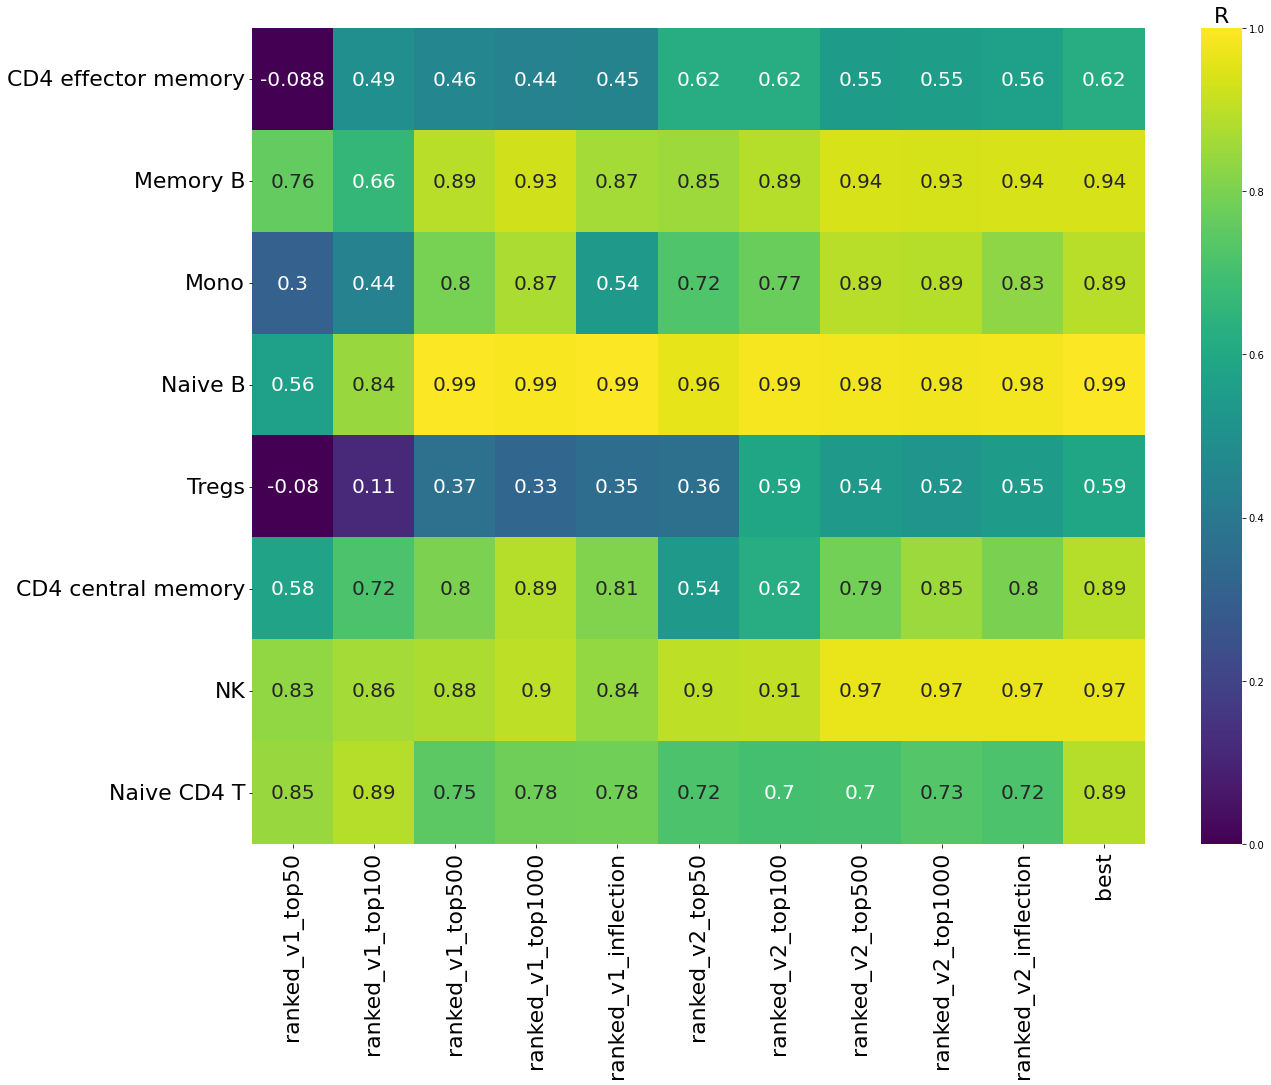

In [12]:
df_pearson_withbestcol=df_pearson.copy()
df_pearson_withbestcol['best']=df_pearson_withbestcol.max(axis=1)
df_pearson_withbestcol.to_csv(fol + '_pearson_correlation_withbest.txt', sep='\t')
plt.figure(figsize=(20,15))
pearson_heatmap = sns.heatmap(df_pearson_withbestcol, cmap='viridis', annot=True,annot_kws={"size": 20}, vmin=0.0, vmax=1.0)
pearson_heatmap.set_xticklabels(pearson_heatmap.get_xmajorticklabels(), fontsize = 22,rotation=90)
pearson_heatmap.set_yticklabels(pearson_heatmap.get_ymajorticklabels(), fontsize = 22,rotation=0)
cbar = pearson_heatmap.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('R',fontsize = 22)
pearson_heatmap.set_facecolor('gray')
plt.savefig(fol + '_pearson_heatmap_withbestcol.pdf', bbox_inches='tight')

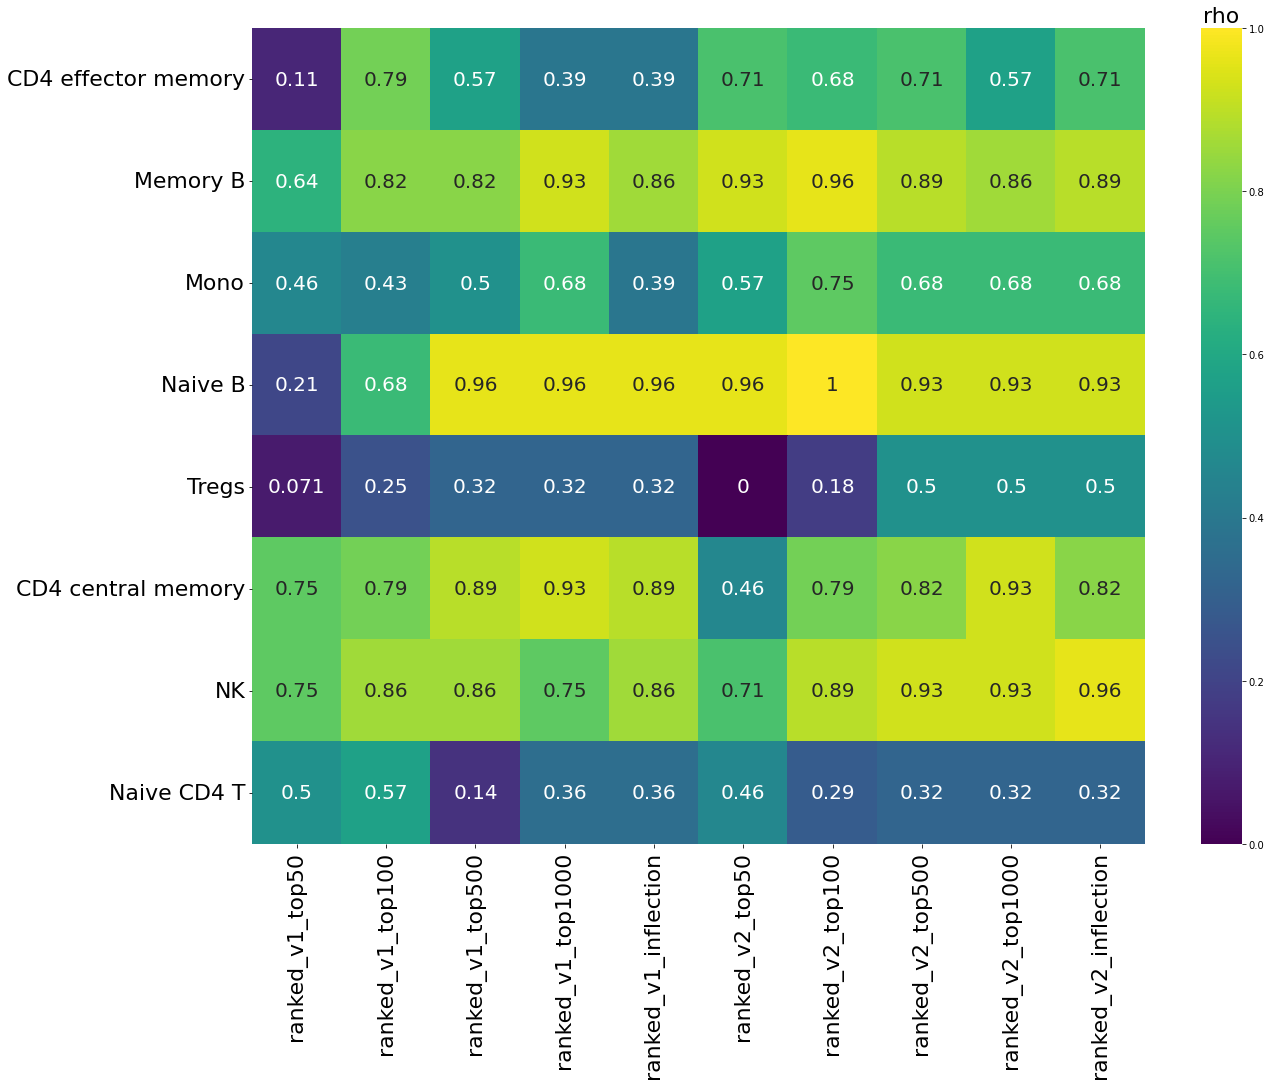

In [13]:
plt.figure(figsize=(20,15))
spearman_heatmap = sns.heatmap(df_spearman, cmap='viridis', annot=True,annot_kws={"size": 20}, vmin=0.0, vmax=1.0)
spearman_heatmap.set_xticklabels(spearman_heatmap.get_xmajorticklabels(), fontsize = 22,rotation=90)
spearman_heatmap.set_yticklabels(spearman_heatmap.get_ymajorticklabels(), fontsize = 22,rotation=0)
cbar = spearman_heatmap.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('rho',fontsize = 22)
spearman_heatmap.set_facecolor('gray')
plt.savefig(fol + '_spearman_heatmap.pdf', bbox_inches='tight')

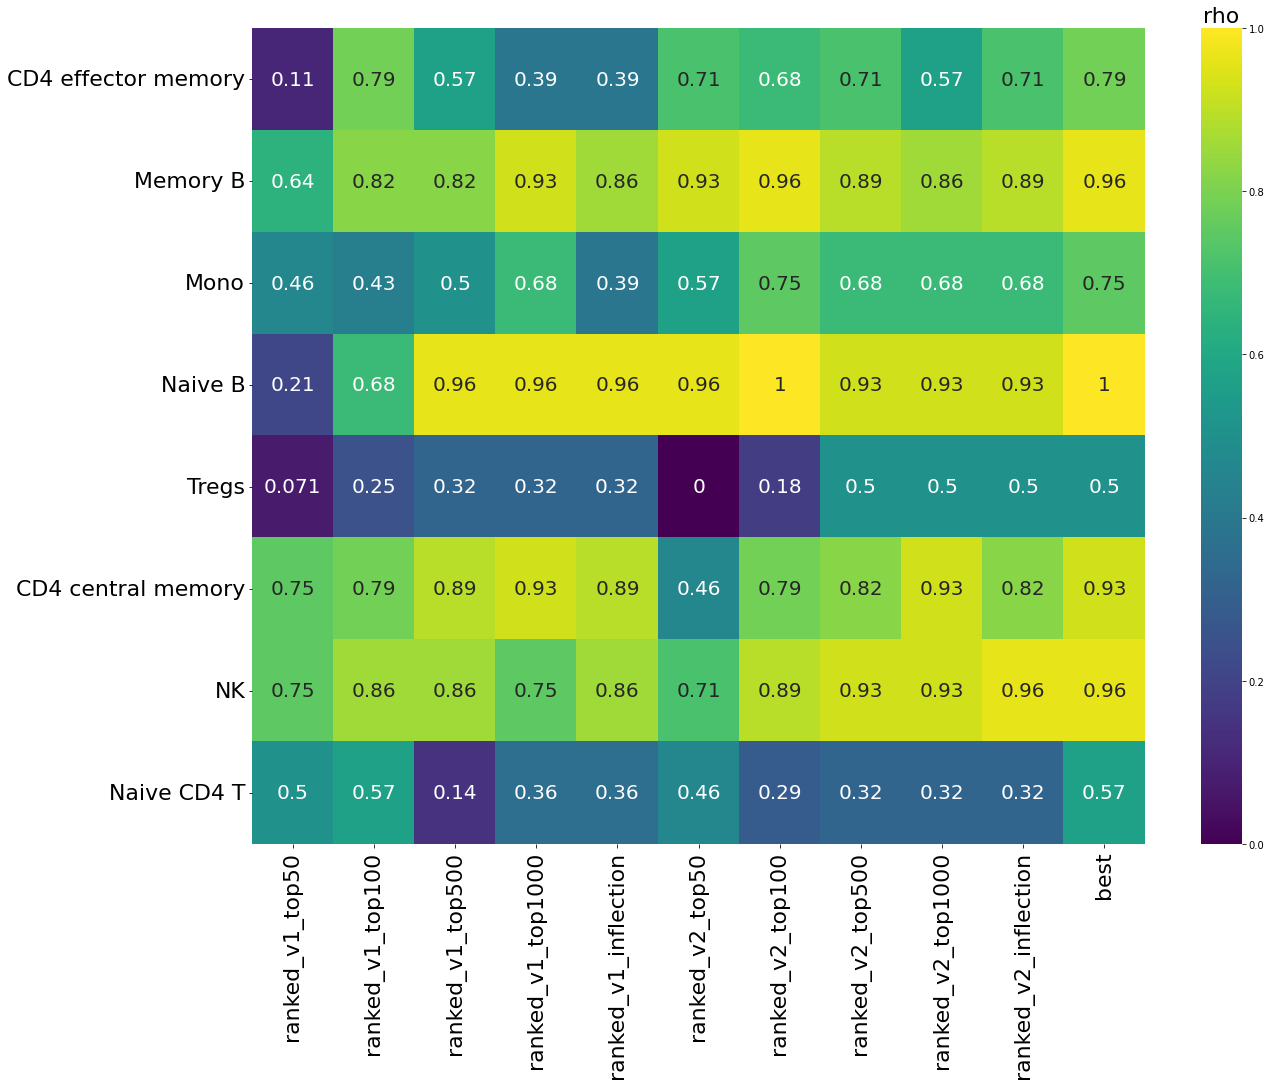

In [14]:
df_spearman_withbestcol=df_spearman.copy()
df_spearman_withbestcol['best']=df_spearman_withbestcol.max(axis=1)
df_spearman_withbestcol.to_csv(fol + '_spearman_correlation_withbest.txt', sep='\t')
plt.figure(figsize=(20,15))
spearman_heatmap = sns.heatmap(df_spearman_withbestcol, cmap='viridis', annot=True,annot_kws={"size": 20}, vmin=0.0, vmax=1.0)
spearman_heatmap.set_xticklabels(spearman_heatmap.get_xmajorticklabels(), fontsize = 22,rotation=90)
spearman_heatmap.set_yticklabels(spearman_heatmap.get_ymajorticklabels(), fontsize = 22,rotation=0)
cbar = spearman_heatmap.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('rho',fontsize = 22)
spearman_heatmap.set_facecolor('gray')
plt.savefig(fol + '_spearman_heatmap_withbestcol.pdf', bbox_inches='tight')

In [15]:
df_pearson_mean=df_pearson.mean()
df_pearson_mean=df_pearson_mean.to_frame(name='Mean')
df_pearson_mean=df_pearson_mean.transpose()
df_pearson_mean

,ranked_v1_top50,ranked_v1_top100,ranked_v1_top500,ranked_v1_top1000,ranked_v1_inflection,ranked_v2_top50,ranked_v2_top100,ranked_v2_top500,ranked_v2_top1000,ranked_v2_inflection
Mean,0.465106,0.628728,0.742417,0.765981,0.70364,0.710346,0.761611,0.795969,0.802744,0.793395


In [16]:
df_pearson_median=df_pearson.median()
df_pearson_median=df_pearson_median.to_frame(name='Median')
df_pearson_median=df_pearson_median.transpose()
df_pearson_median

,ranked_v1_top50,ranked_v1_top100,ranked_v1_top500,ranked_v1_top1000,ranked_v1_inflection,ranked_v2_top50,ranked_v2_top100,ranked_v2_top500,ranked_v2_top1000,ranked_v2_inflection
Median,0.572276,0.689435,0.800004,0.879749,0.795786,0.719224,0.736029,0.840448,0.868584,0.815734


In [17]:
dfsummary=pd.concat([df_pearson_mean,df_pearson_median])
dfsummary=dfsummary[irfmethodnames]

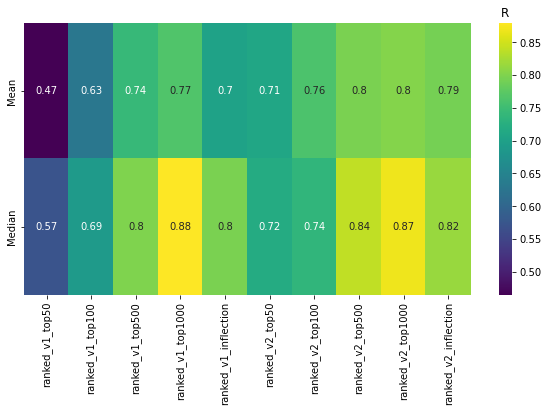

In [18]:
plt.figure(figsize=(10,5))
pearson_heatmap = sns.heatmap(dfsummary, cmap='viridis', annot=True)
cbar = pearson_heatmap.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('R')
pearson_heatmap.set_facecolor('gray')
plt.savefig(fol + '_pearson_heatmap_summary.pdf', bbox_inches='tight')

In [19]:
df_spearman_mean=df_spearman.mean()
df_spearman_mean=df_spearman_mean.to_frame(name='Mean')
df_spearman_mean=df_spearman_mean.transpose()
df_spearman_mean

,ranked_v1_top50,ranked_v1_top100,ranked_v1_top500,ranked_v1_top1000,ranked_v1_inflection,ranked_v2_top50,ranked_v2_top100,ranked_v2_top500,ranked_v2_top1000,ranked_v2_inflection
Mean,0.4375,0.647321,0.633929,0.665179,0.629464,0.602679,0.691964,0.723214,0.714286,0.727679


In [20]:
df_spearman_median=df_spearman.median()
df_spearman_median=df_spearman_median.to_frame(name='Median')
df_spearman_median=df_spearman_median.transpose()
df_spearman_median

,ranked_v1_top50,ranked_v1_top100,ranked_v1_top500,ranked_v1_top1000,ranked_v1_inflection,ranked_v2_top50,ranked_v2_top100,ranked_v2_top500,ranked_v2_top1000,ranked_v2_inflection
Median,0.482143,0.732143,0.696429,0.714286,0.625,0.642857,0.767857,0.767857,0.767857,0.767857


In [21]:
dfsummary=pd.concat([df_spearman_mean,df_spearman_median])
dfsummary=dfsummary[irfmethodnames]
dfsummary

,ranked_v1_top50,ranked_v1_top100,ranked_v1_top500,ranked_v1_top1000,ranked_v1_inflection,ranked_v2_top50,ranked_v2_top100,ranked_v2_top500,ranked_v2_top1000,ranked_v2_inflection
Mean,0.437500,0.647321,0.633929,0.665179,0.629464,0.602679,0.691964,0.723214,0.714286,0.727679
Median,0.482143,0.732143,0.696429,0.714286,0.625000,0.642857,0.767857,0.767857,0.767857,0.767857


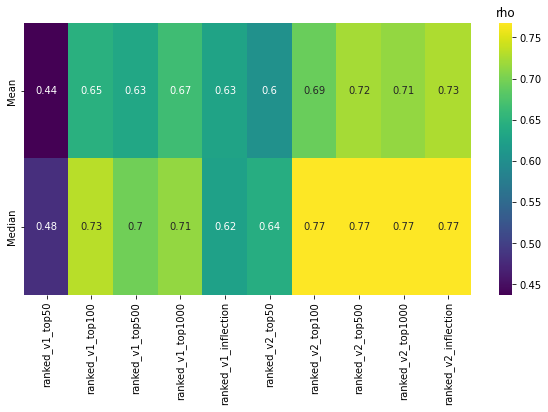

In [22]:
plt.figure(figsize=(10,5))
spearman_heatmap = sns.heatmap(dfsummary, cmap='viridis', annot=True)
cbar = spearman_heatmap.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('rho')
pearson_heatmap.set_facecolor('gray')
plt.savefig(fol + '_spearman_heatmap_summary.pdf', bbox_inches='tight')